The above figure shows how the function m(x) is changing and it also shows that no matter which value of x we choose the rate of change of m(x) always remains a 2. We can verify the above result with SymPy:

In [1]:
from sympy import diff, sqrt, pprint 
from sympy.abc import x

expression = 2*x + 5
result = diff(expression, x)
print("Derivative of")
pprint(expression)
print("with respect to x is")
pprint(result) 

Derivative of
2⋅x + 5
with respect to x is
2


In [5]:
from sympy import diff, sqrt, pprint 
from sympy.abc import x

expression = sqrt(x**2 + 1)
result = diff(expression, x)
print("Derivative of")
pprint(expression)
print("with respect to x is")
pprint(result) 

Derivative of
   ________
  ╱  2     
╲╱  x  + 1 
with respect to x is
     x     
───────────
   ________
  ╱  2     
╲╱  x  + 1 


In [1]:
from sympy import diff, sqrt, pprint
from sympy.abc import x

expression = 1/x
result = diff(expression, x)
print("Derivative of")
pprint(expression)
print("with respect to x is")
pprint(result)

Derivative of
1
─
x
with respect to x is
-1 
───
 2 
x  


In [2]:
from sympy import diff, sqrt, pprint
from sympy.abc import x

expression = 1/x**2
result = diff(expression, x)
print("Derivative of")
pprint(expression)
print("with respect to x is")
pprint(result)

Derivative of
1 
──
 2
x 
with respect to x is
-2 
───
 3 
x  


In [3]:
from sympy import diff, sqrt, pprint
from sympy.abc import x

expression = 1/x**3
result = diff(expression, x)
print("Derivative of")
pprint(expression)
print("with respect to x is")
pprint(result)

Derivative of
1 
──
 3
x 
with respect to x is
-3 
───
 4 
x  


In [1]:
from sympy import diff, pprint
from sympy.abc import x
expressions = [x**2, 3*x**5, 4*x**9] 
for expression in expressions:
      result = diff(expression, x)
      print("Derivative of")
      pprint(expression)
      print("with respect to x is")
      pprint(result)
      print()
      

Derivative of
 2
x 
with respect to x is
2⋅x

Derivative of
   5
3⋅x 
with respect to x is
    4
15⋅x 

Derivative of
   9
4⋅x 
with respect to x is
    8
36⋅x 



In [2]:
from sympy import diff, pprint, powsimp, simplify 
from sympy.abc import x
expressions = ["k*x**a", "x**0.2", "x**pi", "x**(-3/4)"] 
for expression in expressions:
      expression = simplify(expression)
      result = diff(expression, x)
      print("Derivative of")
      pprint(expression)
      print("with respect to x is")
      pprint(powsimp(result))
      print()
      

Derivative of
   a
k⋅x 
with respect to x is
     a - 1
a⋅k⋅x     

Derivative of
 0.2
x   
with respect to x is
     -0.8
0.2⋅x    

Derivative of
 π
x 
with respect to x is
   -1 + π
π⋅x      

Derivative of
 1  
────
 3/4
x   
with respect to x is
 -3   
──────
   7/4
4⋅x   



In [14]:
 # finding the derivative of the sine and cosine functions
from sympy import diff
from sympy import sin
from sympy import cos
from sympy import symbols
  # define variable as symbol

x = symbols('x')

# find the first derivative of sine and cosine with respect to x
print('The first derivative of sine is:', diff(sin(x), x))
print('The first derivative of cosine is:', diff(cos(x), x))
  # find the second derivative of sine and cosine with respect to x
print('\nThe second derivative of sine is:', diff(sin(x), x, x))
print('The second derivative of cosine is:', diff(cos(x), x, x))
  # find the second derivative of sine and cosine with respect to x
print('\nThe second derivative of sine is:', diff(sin(x), x, 2))
print('The second derivative of cosine is:', diff(cos(x), x, 2))

print('The first derivative of sine is:', diff(sin(0)))

print('The first derivative of sine is:', diff(sin(0)), 'with respect to cos x', cos(0))

The first derivative of sine is: cos(x)
The first derivative of cosine is: -sin(x)

The second derivative of sine is: -sin(x)
The second derivative of cosine is: -cos(x)

The second derivative of sine is: -sin(x)
The second derivative of cosine is: -cos(x)
The first derivative of sine is: 0
The first derivative of sine is: 0 with respect to cos x 1


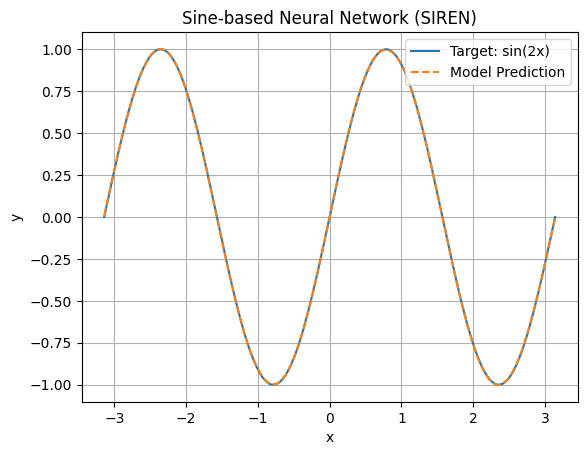

In [1]:
# Code a small PyTorch  example of this sine-based neural network
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Custom sine activation
class SineLayer(nn.Module):
    def forward(self, x):
        return torch.sin(x)

# Sine-based neural network
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            SineLayer(),
            nn.Linear(16, 16),
            SineLayer(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

# Generate training data for y = sin(2x)
x_train = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1).astype(np.float32)
y_train = np.sin(2 * x_train)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x_train)
y_tensor = torch.tensor(y_train)

# Initialize model, loss function, and optimizer
model = SineNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(x_tensor)
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()

# Predict and plot results
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

plt.plot(x_train, y_train, label="Target: sin(2x)")
plt.plot(x_train, y_pred, '--', label="Model Prediction")
plt.legend()
plt.grid(True)
plt.title("Sine-based Neural Network (SIREN)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
